In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from lib import *
import scipy
import torchvision

In [8]:
train_tfms = get_transforms()

In [10]:
ds = torchvision.datasets.CIFAR10(root = "../data/", 
                                  train = True, 
                                  transform  = train_tfms, 
                                  target_transform = None, 
                                  download = False)

In [11]:
mean, var = get_stats(ds)

In [12]:
mean

0.4760792565329165

In [13]:
lambda_ = np.load("../NCE_results/precision_matrix_mask.npy")

In [18]:
lambda_ = np.clip(lambda_, 0, 1)

In [19]:
L = np.linalg.cholesky(lambda_)

In [3]:
lambda_.dtype

dtype('float64')

In [20]:
res = mean + scipy.linalg.solve_triangular(L, np.random.normal(size=28**2), lower=True)
res = res.reshape(28, 28)

# Sampling

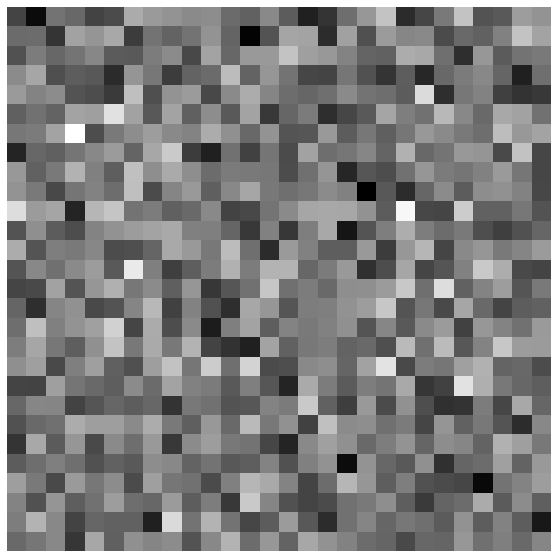

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray");
plt.axis("off");